<>:61: SyntaxWarning: invalid escape sequence '\c'
<>:61: SyntaxWarning: invalid escape sequence '\c'
C:\Users\davib\AppData\Local\Temp\ipykernel_15212\2775497638.py:61: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Time response y$_k$(u) = g$\cdot$u$_k$")
c:\Users\davib\miniconda3\envs\sippy\Lib\site-packages\control\timeresp.py:940: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


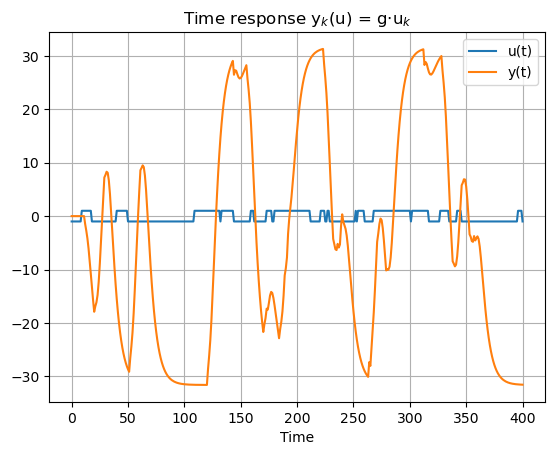

In [1]:
#!/usr/bin/env python
# coding: utf-8
"""
ARMAX Example

@author: Giuseppe Armenise, revised by RBdC
"""

from __future__ import division
from past.utils import old_div
from sippy import functionset as fset
from sippy import *
import numpy as np
import control.matlab as cnt
import matplotlib.pyplot as plt

## TEST IDENTIFICATION METHODS for ARMAX model

# Define sampling time and Time vector
sampling_time = 1.                                  # [s]
end_time = 400                                      # [s]
npts = int(old_div(end_time, sampling_time)) + 1
Time = np.linspace(0, end_time, npts)

# Define Generalize Binary Sequence as input signal
switch_probability = 0.08  # [0..1]
[Usim,_,_] = fset.GBN_seq(npts, switch_probability, Range = [-1, 1])

# Define white noise as noise signal
white_noise_variance = [0.01]
e_t = fset.white_noise_var(Usim.size, white_noise_variance)[0]

# ## Define the system (ARMAX model)

# ### Numerator of noise transfer function has two roots: nc = 2

NUM_H = [1., 0.3, 0.2, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

# ### Common denominator between input and noise transfer functions has 4 roots: na = 4

DEN = [1., -2.21, 1.7494, -0.584256, 0.0684029, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

# ### Numerator of input transfer function has 3 roots: nb = 3

NUM = [1.5, -2.07, 1.3146]

# ### Define transfer functions

g_sample = cnt.tf(NUM, DEN, sampling_time)
h_sample = cnt.tf(NUM_H, DEN, sampling_time)

# ## Time responses

# ### Input reponse

Y1, Time, Xsim = cnt.lsim(g_sample, Usim, Time)
plt.figure(0)
plt.plot(Time, Usim)
plt.plot(Time, Y1)
plt.xlabel("Time")
plt.title("Time response y$_k$(u) = g$\cdot$u$_k$")
plt.legend(['u(t)', 'y(t)'])
plt.grid()
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
C:\Users\davib\AppData\Local\Temp\ipykernel_15212\1442481043.py:8: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Time response y$_k$(e) = h$\cdot$e$_k$")


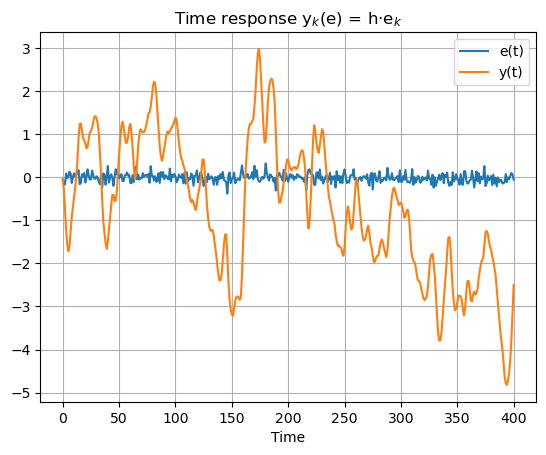

In [2]:
# ### Noise response

Y2, Time, Xsim = cnt.lsim(h_sample, e_t, Time)
plt.figure(1)
plt.plot(Time, e_t)
plt.plot(Time, Y2)
plt.xlabel("Time")
plt.title("Time response y$_k$(e) = h$\cdot$e$_k$")
plt.legend(['e(t)', 'y(t)'])
plt.grid()
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
C:\Users\davib\AppData\Local\Temp\ipykernel_15212\293549592.py:10: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Time response y$_k$ = g$\cdot$u$_k$ + h$\cdot$e$_k$")


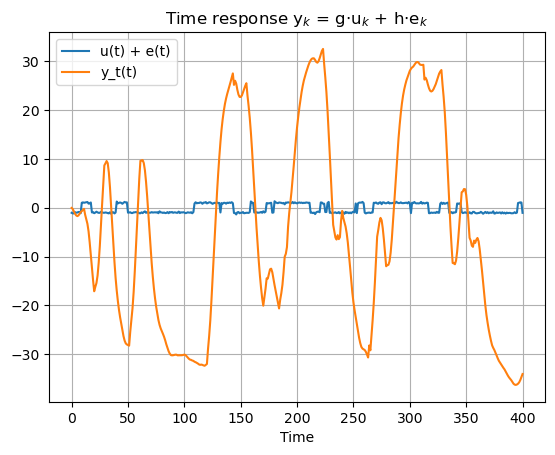

In [3]:
# ## Total output
# $$Y_t = Y_1 + Y_2 = G.u + H.e$$

Ytot = Y1 + Y2
Utot = Usim + e_t
plt.figure(2)
plt.plot(Time, Utot)
plt.plot(Time, Ytot)
plt.xlabel("Time")
plt.title("Time response y$_k$ = g$\cdot$u$_k$ + h$\cdot$e$_k$")
plt.legend(['u(t) + e(t)', 'y_t(t)'])
plt.grid()

In [4]:

##### SYSTEM IDENTIFICATION from collected data

# choose identification mode
mode = 'FIXED'

if mode == 'IC':
    # use Information criterion

    Id_ARMAXi = system_identification(Ytot, Usim, 'ARMAX', IC='AIC', na_ord=[4, 4], nb_ord=[3, 3],
                              nc_ord=[2, 2], delays=[11, 11], max_iterations=300, ARMAX_mod = 'ILLS')

    Id_ARMAXo = system_identification(Ytot, Usim, 'ARMAX', IC='AICc', na_ord=[4, 4], nb_ord=[3, 3],
                                      nc_ord=[2, 2], delays=[11, 11], max_iterations=300, ARMAX_mod = 'OPT')

    Id_ARMAXr = system_identification(Ytot, Usim, 'ARMAX', IC='BIC', na_ord=[4, 4], nb_ord=[3, 3],
                              nc_ord=[2, 2], delays=[11, 11], max_iterations=300, ARMAX_mod = 'RLLS')


elif mode == 'FIXED':
    # use fixed model orders

    na_ord = [4]; nb_ord = [[3]]; nc_ord = [2]; theta = [[11]]

    # ITERATIVE ARMAX
    Id_ARMAXi = system_identification(Ytot, Usim, 'ARMAX', ARMAX_orders = [na_ord, nb_ord, nc_ord, theta],
                                      max_iterations = 300, ARMAX_mod = 'ILLS')

    # OPTIMIZATION-BASED ARMAX
    Id_ARMAXo = system_identification(Ytot, Usim, 'ARMAX', ARMAX_orders = [na_ord, nb_ord, nc_ord, theta],
                                      max_iterations = 300, ARMAX_mod = 'OPT')

    # RECURSIVE ARMAX
    Id_ARMAXr = system_identification(Ytot, Usim, 'ARMAX', ARMAX_orders = [na_ord, nb_ord, nc_ord, theta],
                                      max_iterations=300, ARMAX_mod = 'RLLS')

print(Id_ARMAXi.G)
print(Id_ARMAXo.G)
print(Id_ARMAXr.G)


              1.515 z^2 - 2.035 z + 1.269
--------------------------------------------------------
z^14 - 2.189 z^13 + 1.71 z^12 - 0.563 z^11 + 0.0653 z^10

dt = 1.0


                1.514 z^2 - 2.033 z + 1.268
-----------------------------------------------------------
z^14 - 2.187 z^13 + 1.707 z^12 - 0.5625 z^11 + 0.06586 z^10

dt = 1.0


                1.515 z^2 - 2.032 z + 1.271
-----------------------------------------------------------
z^14 - 2.185 z^13 + 1.705 z^12 - 0.5631 z^11 + 0.06705 z^10

dt = 1.0



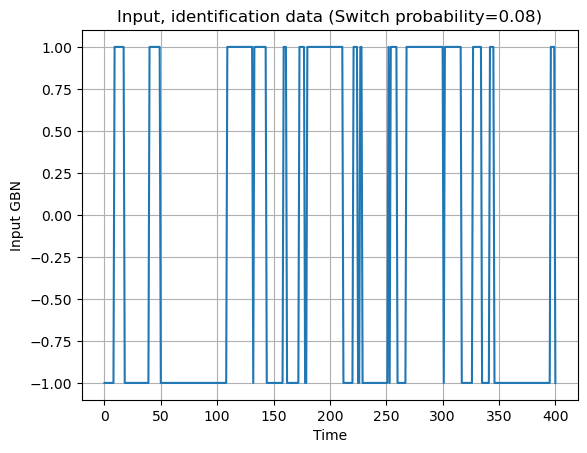

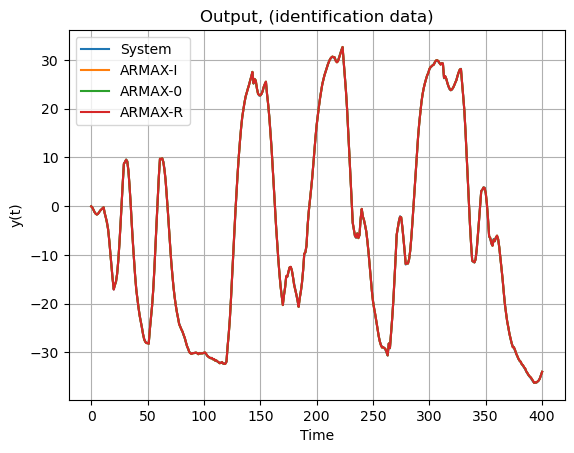

In [8]:
Y_armaxi = Id_ARMAXi.Yid.T
Y_armaxo = Id_ARMAXo.Yid.T
Y_armaxr = Id_ARMAXr.Yid.T

# ## Check consistency of the identified system

plt.figure(3)
plt.plot(Time, Usim)
plt.ylabel("Input GBN")
plt.xlabel("Time")
plt.title("Input, identification data (Switch probability=0.08)")
plt.grid()
plt.show()

plt.figure(4)
plt.plot(Time, Ytot)
plt.plot(Time, Y_armaxi)
plt.plot(Time, Y_armaxo)
plt.plot(Time, Y_armaxr)
plt.grid()
plt.xlabel("Time")
plt.ylabel("y(t)")
plt.title("Output, (identification data)")
plt.legend(['System', 'ARMAX-I', 'ARMAX-0', 'ARMAX-R'])
plt.show()

c:\Users\davib\miniconda3\envs\sippy\Lib\site-packages\control\timeresp.py:940: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


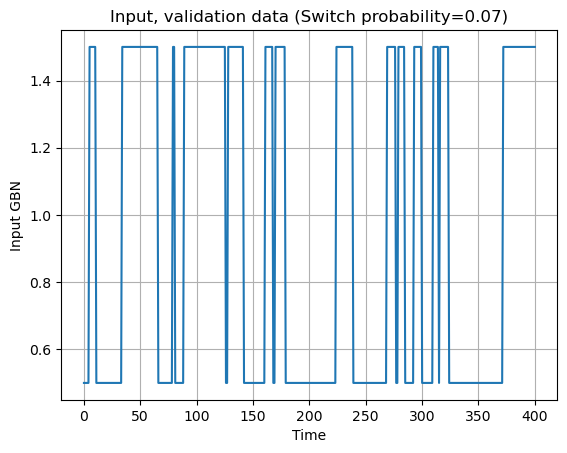

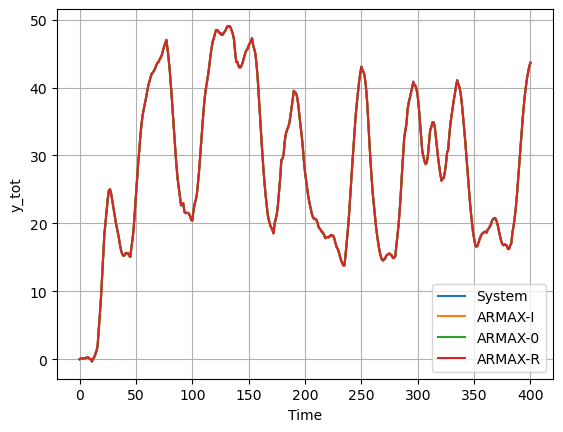

In [9]:
##### VALIDATION of the identified system:
# ## Generate new time series for input and noise

switch_probability = 0.07  # [0..1]
input_range = [0.5, 1.5]
[U_valid,_,_] = fset.GBN_seq(npts, switch_probability, Range = input_range)
white_noise_variance = [0.01]
e_valid = fset.white_noise_var(U_valid.size, white_noise_variance)[0]
#
## Compute time responses for true system with new inputs

Yvalid1, Time, Xsim = cnt.lsim(g_sample, U_valid, Time)
Yvalid2, Time, Xsim = cnt.lsim(h_sample, e_valid, Time)
Ytotvalid = Yvalid1 + Yvalid2

# ## Compute time responses for identified systems with new inputs


# ARMAX - ILLS
Yv_armaxi = fset.validation(Id_ARMAXi,U_valid,Ytotvalid,Time)

# ARMAX - OPT
Yv_armaxo = fset.validation(Id_ARMAXo,U_valid,Ytotvalid,Time)

# ARMAX - RLLS
Yv_armaxr = fset.validation(Id_ARMAXr,U_valid,Ytotvalid,Time)

# Plot
plt.figure(5)
plt.plot(Time, U_valid)
plt.ylabel("Input GBN")
plt.xlabel("Time")
plt.title("Input, validation data (Switch probability=0.07)")
plt.grid()
plt.show()

plt.figure(6)
plt.plot(Time, Ytotvalid)
plt.plot(Time, Yv_armaxi.T)
plt.plot(Time, Yv_armaxo.T)
plt.plot(Time, Yv_armaxr.T)
plt.xlabel("Time")
plt.ylabel("y_tot")
plt.legend(['System', 'ARMAX-I', 'ARMAX-0', 'ARMAX-R'])
plt.grid()
plt.show()

Text(0.5, 1.0, 'Validation: | RMSE ARMAX_i = 17.08')

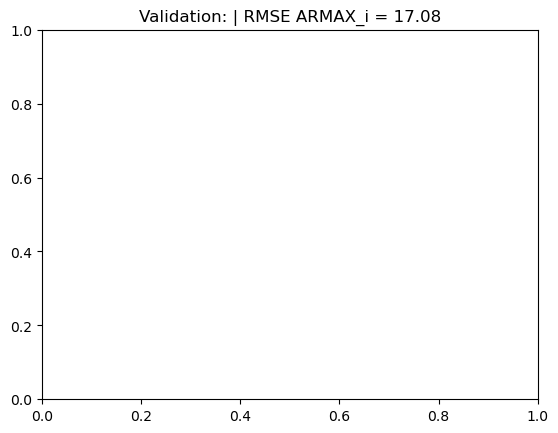

In [12]:
rmse = np.round(np.sqrt(np.mean((Ytotvalid - Yv_armaxi.T) ** 2)), 2)
plt.title("Validation: | RMSE ARMAX_i = {}".format(rmse))


Text(0.5, 1.0, 'Validation: | Explained Variance ARMAX_i = 100.0%')

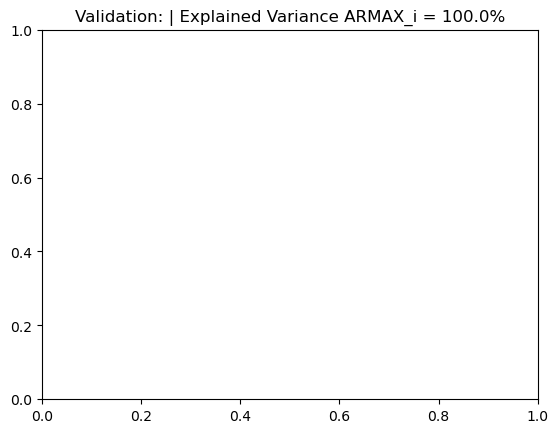

In [13]:
EV = 100*(np.round((1.0 - np.mean((Ytotvalid - Yv_armaxi) ** 2)/np.std(Ytotvalid)), 2))
plt.title("Validation: | Explained Variance ARMAX_i = {}%".format(EV))


c:\Users\davib\miniconda3\envs\sippy\Lib\site-packages\control\lti.py:173: UserWarning: __call__: evaluation above Nyquist frequency
  warn("__call__: evaluation above Nyquist frequency")


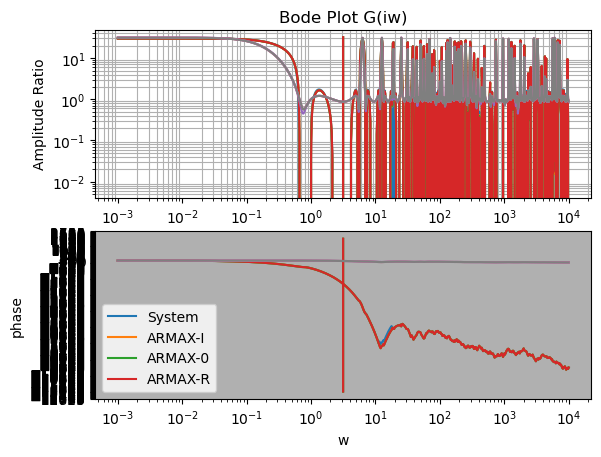

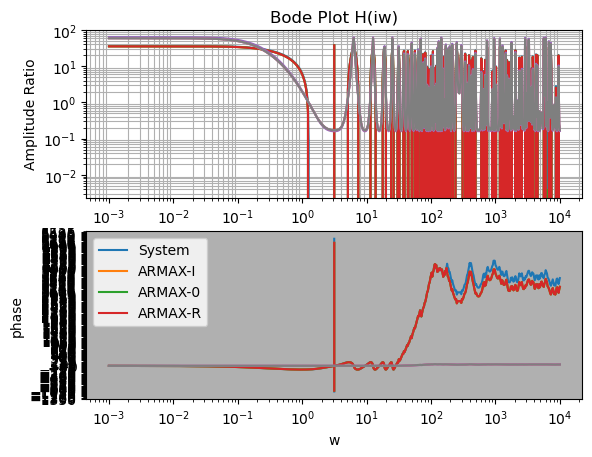

In [14]:
# Bode Plots
w_v = np.logspace(-3,4,num=701)
plt.figure(7)
mag, fi, om = cnt.bode(g_sample,w_v)
mag1, fi1, om = cnt.bode(Id_ARMAXi.G,w_v)
mag2, fi2, om = cnt.bode(Id_ARMAXo.G,w_v)
mag3, fi3, om = cnt.bode(Id_ARMAXr.G,w_v)
plt.subplot(2,1,1), plt.loglog(om,mag), plt.grid(),
plt.loglog(om,mag1), plt.loglog(om,mag2), plt.loglog(om,mag3)
plt.xlabel("w"),plt.ylabel("Amplitude Ratio"), plt.title("Bode Plot G(iw)")
plt.subplot(2,1,2), plt.semilogx(om,fi), plt.grid()
plt.semilogx(om,fi1), plt.semilogx(om,fi2), plt.semilogx(om,fi3),
plt.xlabel("w"),plt.ylabel("phase")
plt.legend(['System', 'ARMAX-I', 'ARMAX-0', 'ARMAX-R'])

plt.figure(8)
mag, fi, om = cnt.bode(h_sample,w_v)
mag1, fi1, om = cnt.bode(Id_ARMAXi.H,w_v)
mag2, fi2, om = cnt.bode(Id_ARMAXo.H,w_v)
mag3, fi3, om = cnt.bode(Id_ARMAXr.H,w_v)
plt.subplot(2,1,1), plt.loglog(om,mag), plt.grid(),
plt.loglog(om,mag1), plt.loglog(om,mag2), plt.loglog(om,mag3)
plt.xlabel("w"),plt.ylabel("Amplitude Ratio"), plt.title("Bode Plot H(iw)")
plt.subplot(2,1,2), plt.semilogx(om,fi), plt.grid()
plt.semilogx(om,fi1), plt.semilogx(om,fi2), plt.semilogx(om,fi3),
plt.xlabel("w"),plt.ylabel("phase")
plt.legend(['System', 'ARMAX-I', 'ARMAX-0', 'ARMAX-R'])

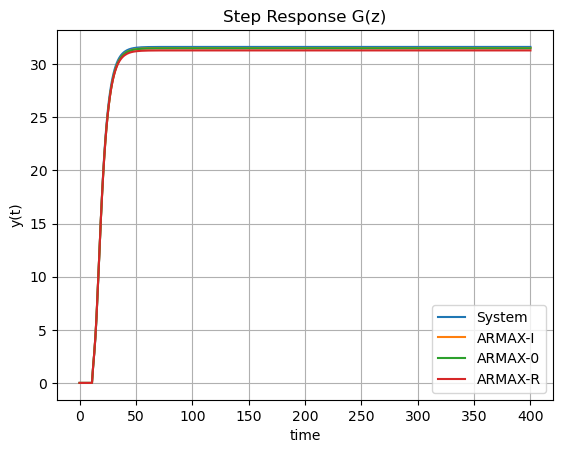

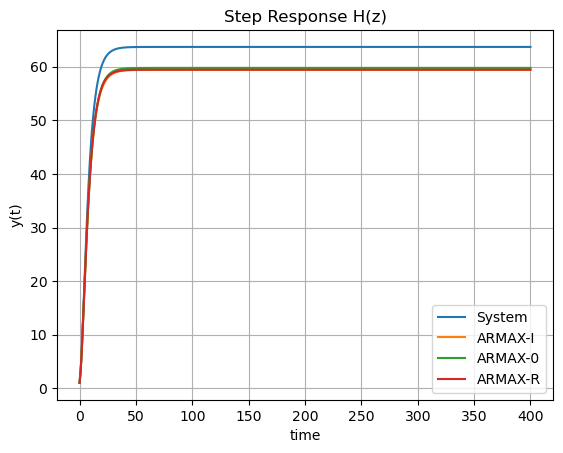

In [15]:
## Step test
# G(z)
plt.figure(9)
yg1 = cnt.step(g_sample,Time)
yg2 = cnt.step(Id_ARMAXi.G,Time)
yg3 = cnt.step(Id_ARMAXo.G,Time)
yg4 = cnt.step(Id_ARMAXr.G,Time)
plt.plot(Time,yg1[0].T)
plt.plot(Time,yg2[0].T)
plt.plot(Time,yg3[0].T)
plt.plot(Time,yg4[0].T)
plt.title("Step Response G(z)")
plt.xlabel("time"),plt.ylabel("y(t)"), plt.grid(),
plt.legend(['System', 'ARMAX-I', 'ARMAX-0', 'ARMAX-R'])
# H(z)
plt.figure(10)
yh1 = cnt.step(h_sample,Time)
yh2 = cnt.step(Id_ARMAXi.H,Time)
yh3 = cnt.step(Id_ARMAXo.H,Time)
yh4 = cnt.step(Id_ARMAXr.H,Time)
plt.plot(Time,yh1[0].T)
plt.plot(Time,yh2[0].T)
plt.plot(Time,yh3[0].T)
plt.plot(Time,yh4[0].T)
plt.title("Step Response H(z)")
plt.xlabel("time"),plt.ylabel("y(t)"), plt.grid(),
plt.legend(['System', 'ARMAX-I', 'ARMAX-0', 'ARMAX-R'])